<a href="https://colab.research.google.com/github/lqdungx/TTNT/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Tải dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Chuẩn hóa dữ liệu về [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Thêm chiều kênh (28,28) -> (28,28,1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Kích thước train:", x_train.shape)
print("Kích thước test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kích thước train: (60000, 28, 28, 1)
Kích thước test: (10000, 28, 28, 1)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,        # xoay
    width_shift_range=0.1,    # dịch ngang
    height_shift_range=0.1,   # dịch dọc
    zoom_range=0.1            # phóng to/thu nhỏ
)

datagen.fit(x_train)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7126 - loss: 0.8645

938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - accuracy: 0.7128 - loss: 0.8637 - val_accuracy: 0.9833 - val_loss: 0.0520
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9321 - loss: 0.2263

938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9321 - loss: 0.2262 - val_accuracy: 0.9883 - val_loss: 0.0326
Epoch 3/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9505 - loss: 0.1644

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9505 - loss: 0.1644 - val_accuracy: 0.9900 - val_loss: 0.0267
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9579 - loss: 0.1396

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9579 - loss: 0.1396 - val_accuracy: 0.9912 - val_loss: 0.0244
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9651 - loss: 0.1170

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9651 - loss: 0.1170 - val_accuracy: 0.9918 - val_loss: 0.0226
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9676 - loss: 0.1065 - val_accuracy: 0.9903 - val_loss: 0.0276
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9699 - loss: 0.1027

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9699 - loss: 0.1027 - val_accuracy: 0.9922 - val_loss: 0.0223
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9719 - loss: 0.0938 - val_accuracy: 0.9902 - val_loss: 0.0289
Epoch 9/10
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9746 - loss: 0.0872

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9746 - loss: 0.0872 - val_accuracy: 0.9924 - val_loss: 0.0209
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9764 - loss: 0.0796

938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9764 - loss: 0.0796 - val_accuracy: 0.9935 - val_loss: 0.0217


In [ ]:
# Đánh giá trên test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Độ chính xác trên tập test:", test_acc)

# Dự đoán
y_pred = model.predict(x_test).argmax(axis=1)

# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))


Độ chính xác trên tập test: 0.9934999942779541
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



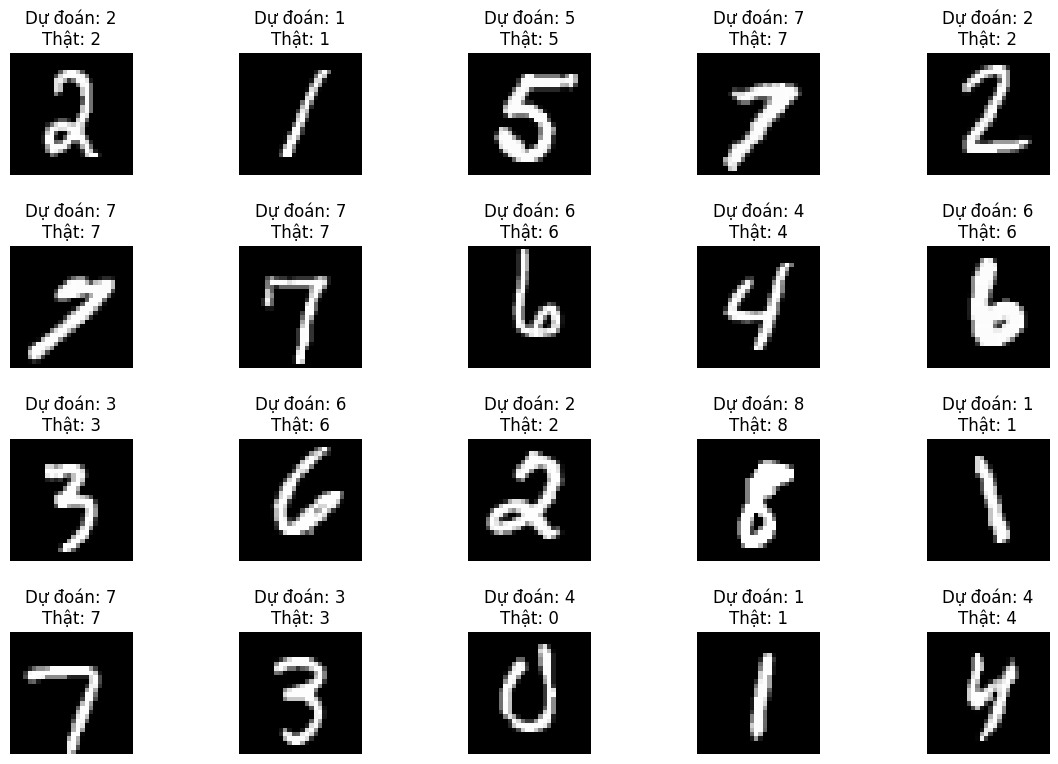

In [ ]:
import random

num_images = 20
indices = random.sample(range(len(x_test)), num_images)  # chọn ngẫu nhiên chỉ số ảnh

plt.figure(figsize=(12, 2*math.ceil(num_images/5)))
for i, idx in enumerate(indices):
    plt.subplot(math.ceil(num_images/5), 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
    plt.title(f"Dự đoán: {y_pred_classes[idx]}\nThật: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
from google.colab import files
files.download("best_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>